# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [19]:
#Import required packages
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

*We illustrate how the relationship between $H_F$ and $H_M$ changes when $\alpha$ and $\sigma$ are different values*

/Users/frederikjuulsollested/projects-2023-joost-adam-og-frederik-1/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  (1-par.alpha)*HM**((par.sigma - 1)/par.sigma) \
/Users/frederikjuulsollested/projects-2023-joost-adam-og-frederik-1/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in reciprocal
  (1-par.alpha)*HM**((par.sigma - 1)/par.sigma) \
/Users/frederikjuulsollested/projects-2023-joost-adam-og-frederik-1/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  + (par.alpha)*HF**((par.sigma - 1)/par.sigma)
/Users/frederikjuulsollested/projects-2023-joost-adam-og-frederik-1/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  + (par.alpha)*HF**((par.sigma - 1)/par.sigma)
/Users/frederikjuulsollested/projects-2023-joost-adam-og-frederik-1/inauguralproject/Household

The matrix v is shown below:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]
the alpha values is represent in the row and sigma values is in the column


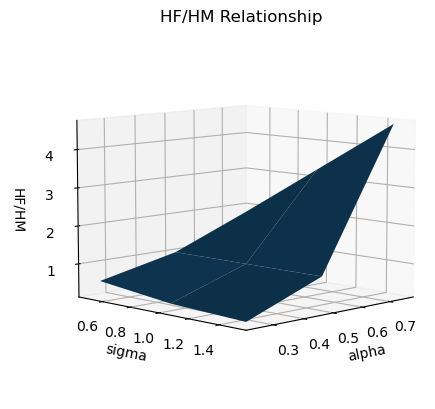

In [20]:
#We define a $\alpha$ and $\sigma$ vector, so they can have different values
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1.0,1.5]
v = np.zeros([3,3])

#We create a loop where we calulate the relationship between $H_F$ and $H_M$, when $\alpha$ and $\sigma$ are the different values in their respective vector.
for it, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha
    for jt, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma
        out = model.solve_discrete()
        #We put all the relationships between $H_F$ and $H_M$ into a 3x3 matrix called v
        v[it,jt] = out.HF/out.HM
print('The matrix v is shown below:')
print(v)
print('the alpha values is represent in the row and sigma values is in the column')

# Here we set up the code to plot the figure
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
alpha_meshgrid, sigma_meshgrid = np.meshgrid(alpha_vec,sigma_vec, indexing='ij')
ax.plot_surface(alpha_meshgrid, sigma_meshgrid, v)

#We invert the x-axis and set up view angle
ax.invert_xaxis()
ax.view_init(elev=8, azim=45)

#Set labels to the figure
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')
ax.set_title("HF/HM Relationship")
plt.show()

In [21]:
#v is the 3x3 vector of the HF/HM relationship with the different values of alpha and sigma
#Alpha values is the row and sigma values is the column
print(v)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


We see that the relationship is equal to 1 no matter the value of $\sigma$, when $\alpha$ = 0.5.
The relationship between $H_F$ and $H_M$ is maximized, when both $\sigma$ and $\alpha$ are their highest value. The relationship between $H_F$ and $H_M$ is minimized, when $\alpha$ is it's lowest value given that $\sigma$ is it's highest value.

# Question 2

Explain your code and procedure

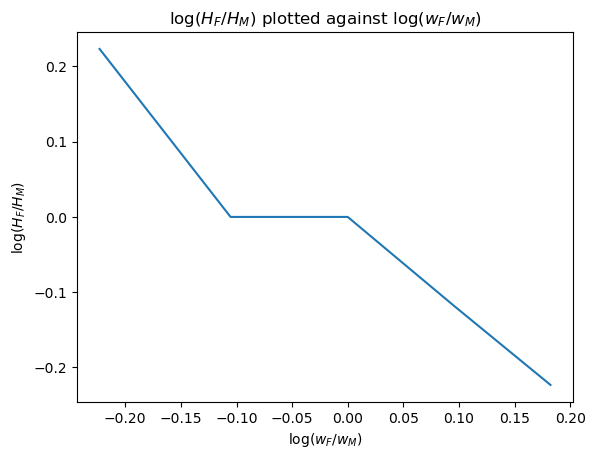

In [22]:
#We reset the parameters
model.par.alpha = 0.5
model.par.sigma = 1

#We run the model for solving the wF vector in discrete time
model.solve_wF_vec(discrete=True)

#From there we create the log of the HF/HM relationship
log_forhold_HF_HM = np.log(model.sol.HF_vec/model.sol.HM_vec)

#Next we create the log of the relationship between the wages, WF and WM
log_forhold_WF_WM = np.log(model.par.wF_vec/model.par.wM)

#Plot the relationships
plt.plot(log_forhold_WF_WM, log_forhold_HF_HM)
plt.title("log($H_F$/$H_M$) plotted against log($w_F$/$w_M$)")
plt.xlabel("log($w_F$/$w_M$)")
plt.ylabel("log($H_F$/$H_M$)")
plt.show()

# Question 3

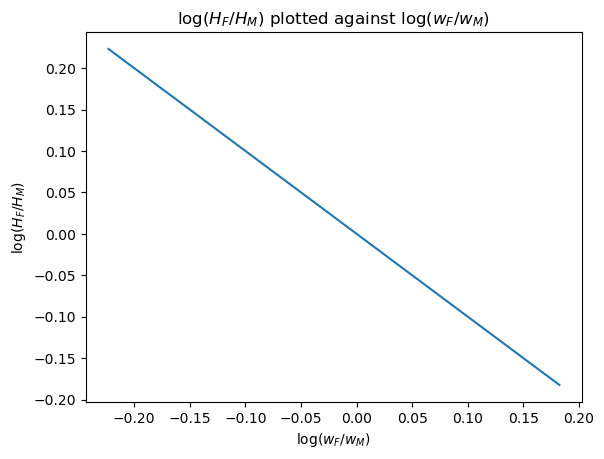

In [23]:
#Run the model for solving the wF vector in continuous time
model.solve_wF_vec(discrete=False)

#Create Log HF/HM relationship
log_forhold_HF_HM = np.log(model.sol.HF_vec/model.sol.HM_vec)

#Next we create the log of the relationship between the wages, WF and WM
log_forhold_WF_WM = np.log(model.par.wF_vec/model.par.wM)

#Plot the relationships
plt.plot(log_forhold_WF_WM, log_forhold_HF_HM)
plt.title("log($H_F$/$H_M$) plotted against log($w_F$/$w_M$)")
plt.xlabel("log($w_F$/$w_M$)")
plt.ylabel("log($H_F$/$H_M$)")
plt.show()

# Question 4

In [24]:
#We run the model to question 4, where we let intital values of $\sigma$ and $\alpha$ be 0.5 and 1.
q4 = model.estimate(alpha=0.5, sigma=1.0)

print(f'The squared difference is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
#print(f'With this the minimized difference is then {q4.dif:.3f}.')

The squared difference is minimized, when alpha is 0.982 and sigma is 0.100.
At these values our beta0 and beta1 coefficients are 0.400 and -0.100.


# Question 5

Our suggestion to a extension of the model is that we take sleep into account in the model as we found it pretty unrealistic, that you can work uptil 24 hours. We will suggest that women and men sleep 8 hours, so they can work uptil 16 hours.

Sadly couldn't write the right code to do that

In [29]:
model.estimate_q5(sigma=1.0,epsilon_M=1.0,epsilon_F=1.0, extend=True)

namespace(sigma=0.09999600388590643,
          epsilon_M=1.4704408706676086,
          epsilon_F=1.1447674203554912)

In [26]:
model.estimate(alpha=0.5, sigma=1.0)

namespace(alpha=0.9820144161103607, sigma=0.09999063664435826)